# Lecture 1: Single systems
from IBM Quantum Computing: Basics of Quantum Information ([Ref Here!](https://learning.quantum.ibm.com/course/basics-of-quantum-information/single-systems))

### Vectors and matrices in Python

아래 코드는 python에서 벡터와 행렬을 정의하고, 연산을 수행하는 방법을 소개한다.   
Quantum Computing에 친숙해지기 위해 가장 기본적인 outcome인 $\ket 0$과 $\ket 1$ ket-vector를 이용해보자.

python에서 주로 `numpy`라는 라이브러리를 사용하여 행렬, 벡터 연산을 다룬다. 기본적인 행렬/벡터는 `array()`를 이용하여 정의한다.

$$\ket {0} =\begin{pmatrix} 1 \\ 0 \end{pmatrix}, \qquad \ket {1} =\begin{pmatrix} 0 \\ 1 \end{pmatrix}$$

In [1]:
import numpy as np

ket0 = np.array([1, 0]) 
ket1 = np.array([0, 1]) 

display(ket0 / 2 + ket1 / 2)

array([0.5, 0.5])

`array()`의 인자로 **같은 row에 있는 entry끼리 리스트로 묶어서** 전달한다. mathematical notation과 헷갈리지 않도록 유의하자.

$$M_1 =\begin{pmatrix} 1 & 1 \\ 0 & 0 \end{pmatrix}, \qquad M_2 = \begin{pmatrix} 1 & 1 \\ 1 & 0\end{pmatrix}$$

In [3]:
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 1], [1, 0]])

M1 / 2 + M2 / 2

array([[1. , 1. ],
       [0.5, 0. ]])

`matmul()`의 안지로 matrix multiplication을 수행할 vector, 또는 matrix를 전달한다. 당연히 피연산자들의 곱해지는 차원이 같도록 맞추어주어야 한다. 

In [4]:
display(np.matmul(M1, ket1))
display(np.matmul(M1, M2))
display(np.matmul(M2, M1))

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

### Qiskit state-vector

아래코드는 quantum computing을 위해 IBM에서 제공하는 SDK `qiskit`을 사용하여 statevector를 다루는 방법을 소개한다. 기본적으로 3차원 공간에 있는 스핀을 표현하기 위해 각 axis별로 2가지 스핀값을 가지므로, 총 6개의 명백한 state가 존재한다. (e.g., $\ket u, \ket d, \ket r, \ket l, \ket i, \ket o$)  

그 외에도 arbitrary quantum state vector를 나타내기 위해 $\ket \psi$ 표현을 이용하며, 이때 state vector는 다음 2가지 조건을 만족해야한다.  
- 각 entry는 complex number를 가진다.
- 각 entry 값의 제곱의 합은 1이 되어야한다.

In [5]:
from qiskit.quantum_info import Statevector

u = Statevector([1 / np.sqrt(2), 1 / np.sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


In [21]:
display(u.draw("latex"))
display(v.draw("latex"))
display(w.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [23]:
display(u.draw("text"))
display(v.draw("text"))
display(w.draw("text"))

[0.70710678+0.j,0.70710678+0.j]

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

[0.33333333+0.j,0.66666667+0.j]

`qiskit`이 제공하는 `Statevector` 클래스를 사용하여 quantum state vector를 정의하면, 현재 값이 state vector가 만족해야하는 2가지 성질을 모두 만족하는지를 확인하여, valid한 값인지 아닌지를 확인할 수 있다.

In [24]:
display(u.is_valid())
display(v.is_valid())
display(w.is_valid()) # (1/3)^2 + (2/3)^2 = 1/9 + 4/9 = 5/9 < 1

True

True

False

In [29]:
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
v.draw("latex")

<IPython.core.display.Latex object>

또한 선언한 `Statevector`의 method `measure()`을 이용하여 해당 quantum state vector를 측정하여 하나의 outcome; classical state vector 값을 얻을 수 있다.  

앞에서 선언한 v state를 측정하면, $\frac{5}{9}$의 확률로 $0$값을 얻고 quantum state는 $\ket 0$으로 transition하며, $\frac{4}{9}$의 확률로 $1$ 값을 얻고 quantum state는 $\ket 1$ transition한다. 

In [30]:
v.measure()

(np.str_('0'),
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

위 측정과정을 여러번 샘플링 할 수 있게 해주는 것이 `sample_counts()`이며, 인자로 샘플링을 수행할 횟수를 전달할 수 있다. 실험 결과를 시각화하면, 각 outcome이 나타난 확률이 quantum state의 coefficient의 제곱의 절댓값과 유사함을 알 수 있다.   

{np.str_('0'): np.int64(563), np.str_('1'): np.int64(437)}

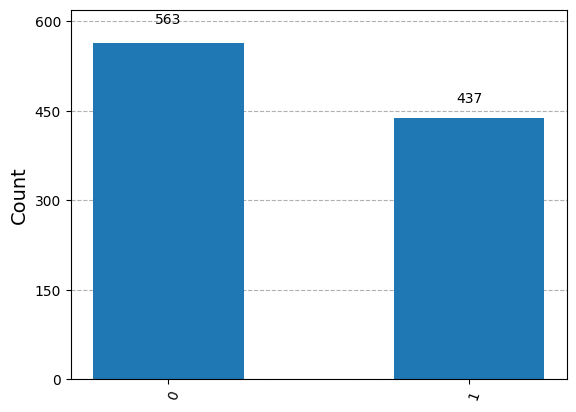

In [31]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

### Qiskit Unitary Operator

##### Pauli Gate
$$I = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix},\qquad \mathbf X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \qquad \mathbf Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \qquad \mathbf Z = \begin{pmatrix} 1 & 0 \\ 9 & -1\end{pmatrix}$$

##### Hadamard Gate
$$\mathbf H = \begin{pmatrix} \frac{1}{\sqrt 2} & \frac{1}{\sqrt 2} \\ \frac{1}{\sqrt 2} & -\frac{1}{\sqrt 2}\end{pmatrix}$$

##### Phase Gate
$$\mathbf P_{\theta} = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\theta}\end{pmatrix}$$

_special case_
$$\mathbf S  = \mathbf P_{\pi/2} = \begin{pmatrix} 1 & 0 \\ 0 & i\end{pmatrix}, \qquad 
\mathbf T = \mathbf P_{\pi/4} = \begin{pmatrix} 1 & 0 \\ 0 & \frac{1+i}{\sqrt 2}\end{pmatrix}$$

`Qiskit`에서는 quantum state에 적용되는 operator 또한 `Operator` 클래스를 사용하여 직접 정의할 수 있다. 

In [33]:
from qiskit.quantum_info import Operator
import numpy as np

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / np.sqrt(2), 1 / np.sqrt(2)], [1 / np.sqrt(2), -1 / np.sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / np.sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

반면, `QuantumCircuit` 클래스를 사용하면 직접 회로 객체를 생성할 수 있다. 생성할 때 인자로는 circuit에 사용할 큐비트의 개수를 넣어주면 된다.
`QuantumCircuit`클래스에는 quantum computing에서 자주 사용되는 Unitary Operator가 미리 다 정의되었기 때문에, 생성한 객체에서 method로 접근하여 게이트를 적용할 수 있다. 

이때, 게이트 method(e.g., `h()`, `t()`, ...)의 인자에는 게이트를 적용할 큐비트의 **인덱스**를 제공하면 된다. (0부터 시작)

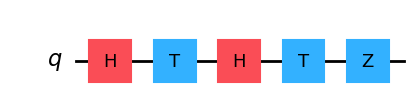

In [34]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw(output='mpl')

사전에 큐비트의 값을 특정한 quantum state vector로 초기화한 뒤, 그 벡터에서 `evolve()` 메소드를 호출하여 회로를 적용시킨 결과로 만들어지는 quantum state vector 값을 얻을 수 있다. 

$$\mathbf v = ZTHTH\ket 0$$

In [19]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

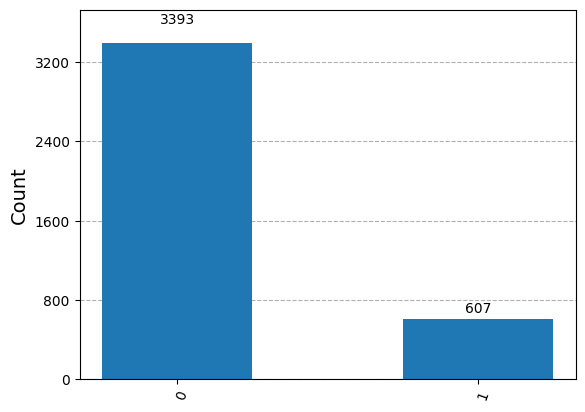

In [20]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)